In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [49]:
df = pd.read_csv('Sheet1.csv')

In [50]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [53]:
# remove the duplicates
df = df.drop_duplicates(subset=['Invoice ID'])

In [27]:
# df['Invoice ID'].nunique()

1000

In [54]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [55]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
# data.drop('Invoice ID',axis=1 , inplace=True)

In [56]:
Num = []
for col in df.columns:
    if (df[col].dtype == int) or (df[col].dtype == float):
        Num.append(col)
        
print(Num)

['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


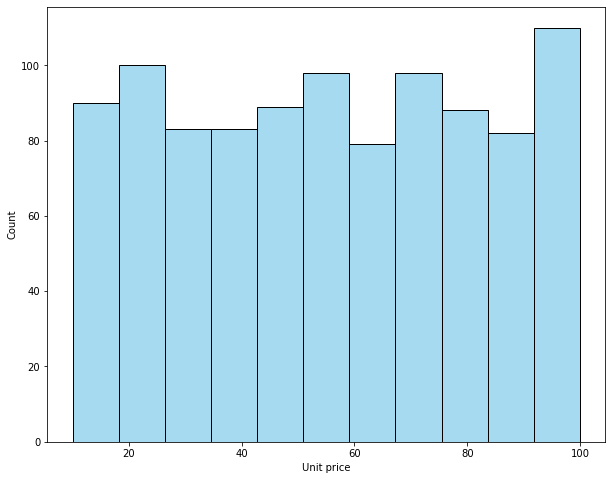

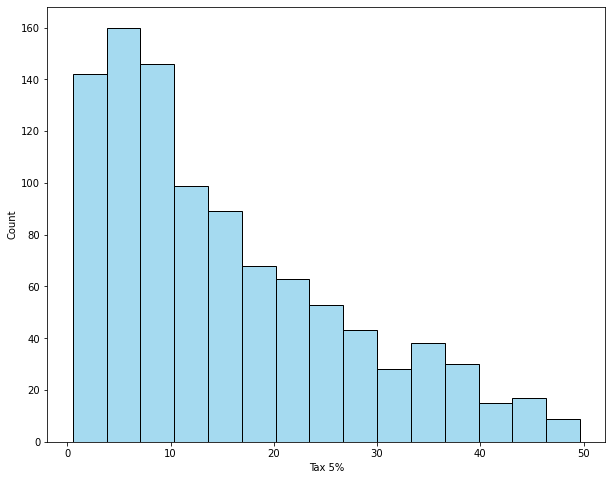

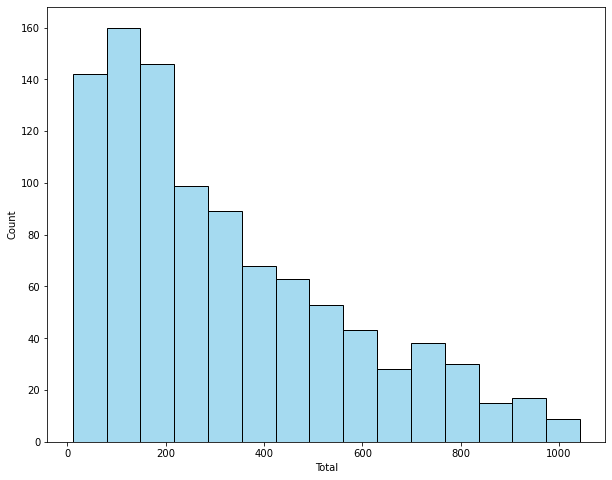

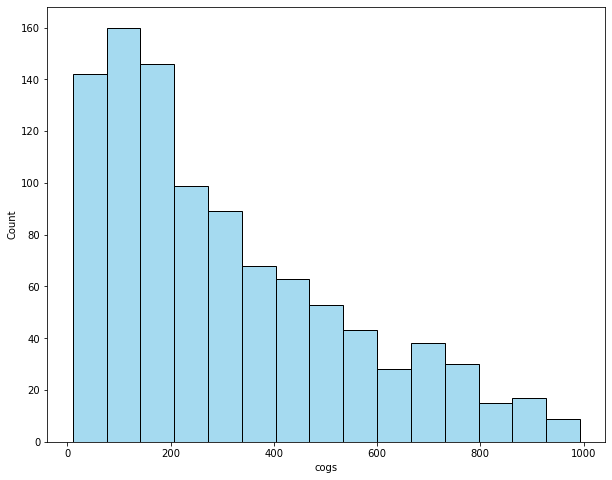

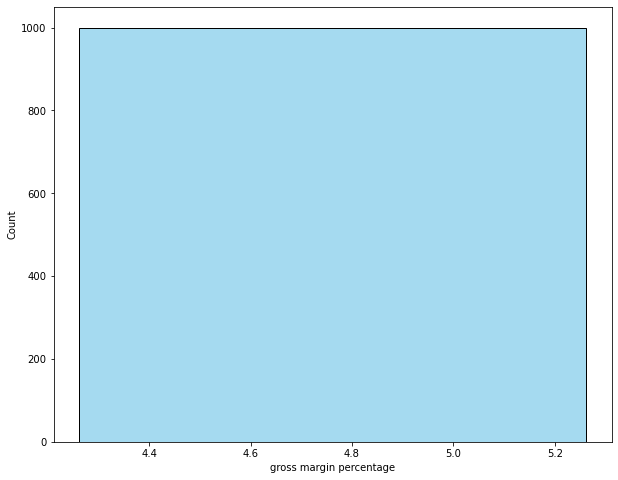

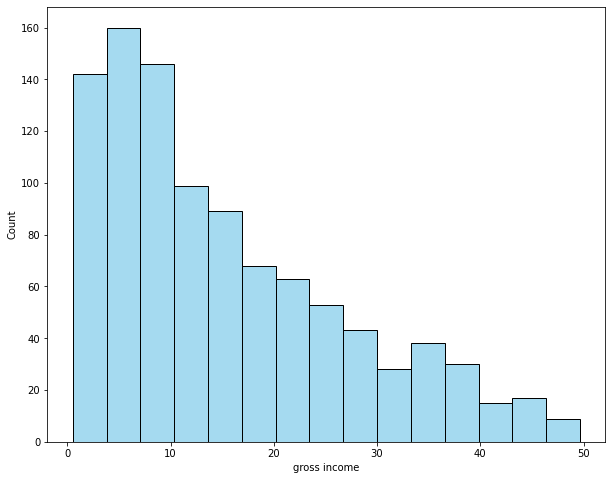

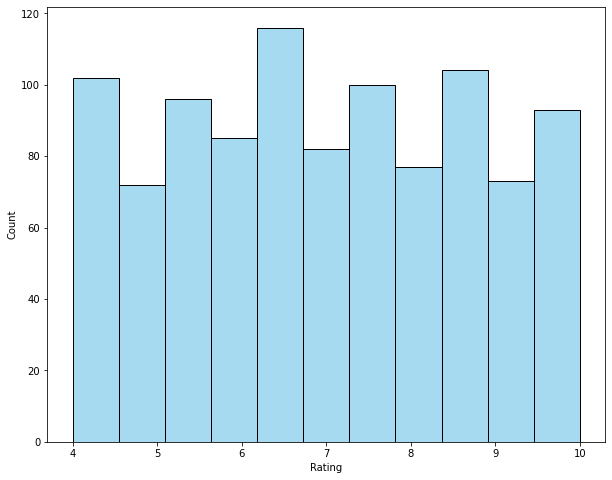

In [57]:
for col in Num:
    plt.figure(figsize=(10,8))
    sns.histplot(df[col], color="skyblue")
    plt.show()

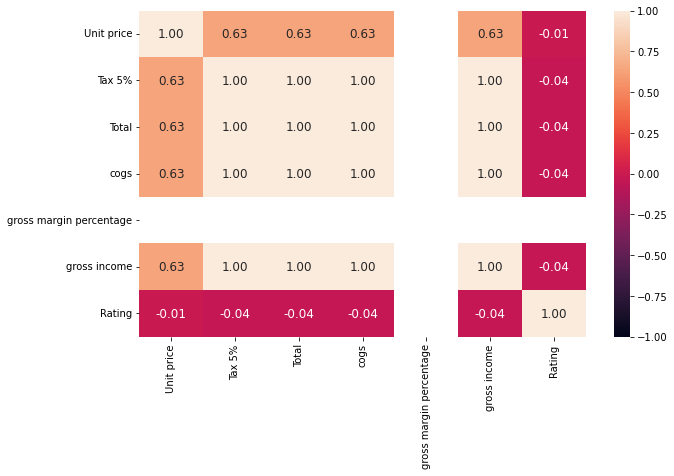

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df[Num].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

In [59]:
categorical = []
for col in df.columns:
    if  (df[col].dtype == object):
        categorical.append(col)
        
print(categorical)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


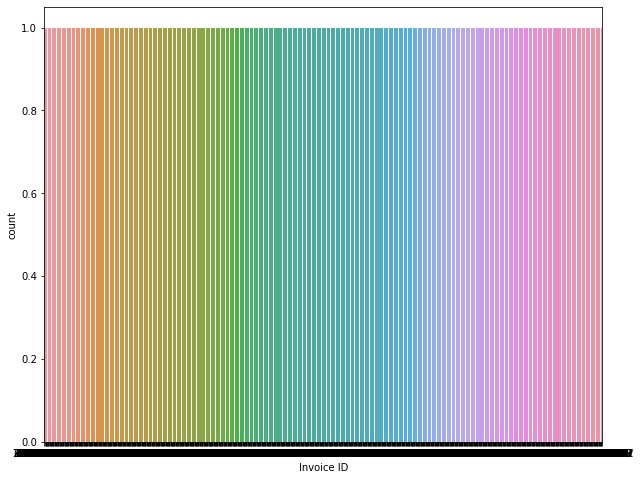

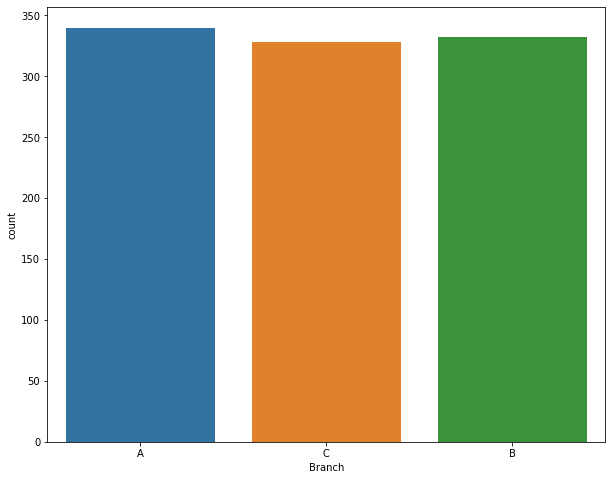

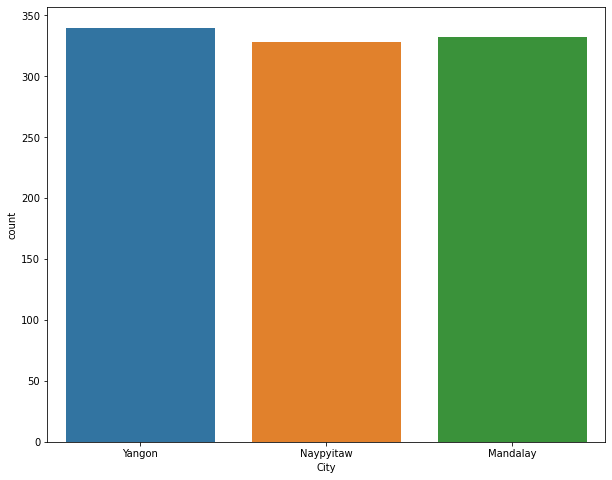

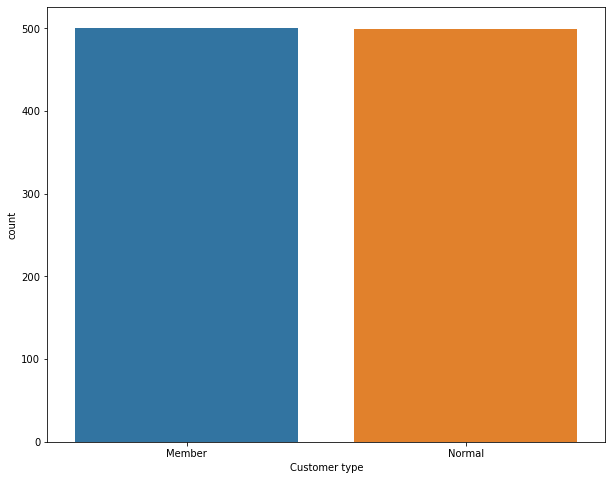

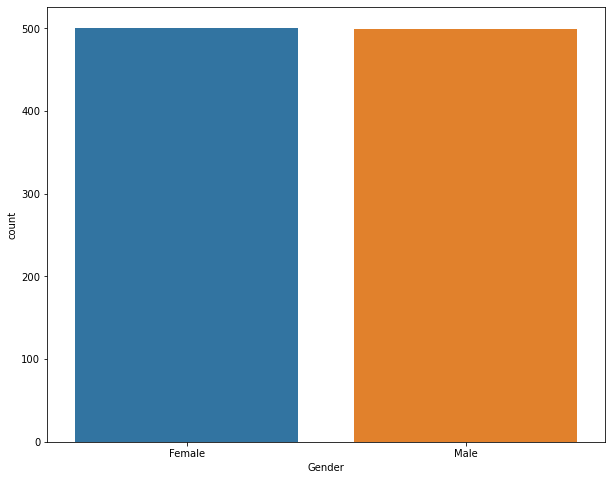

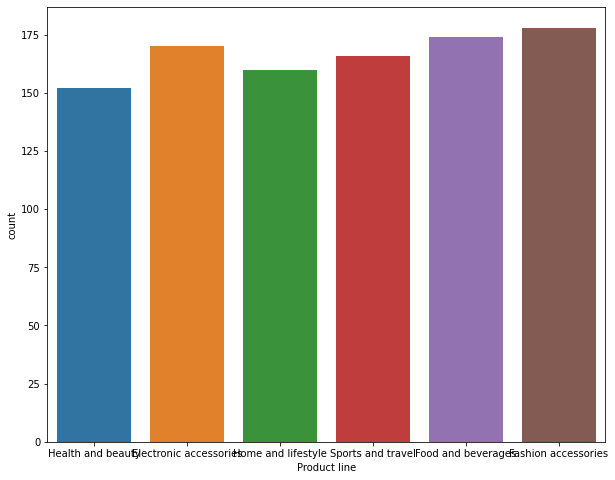

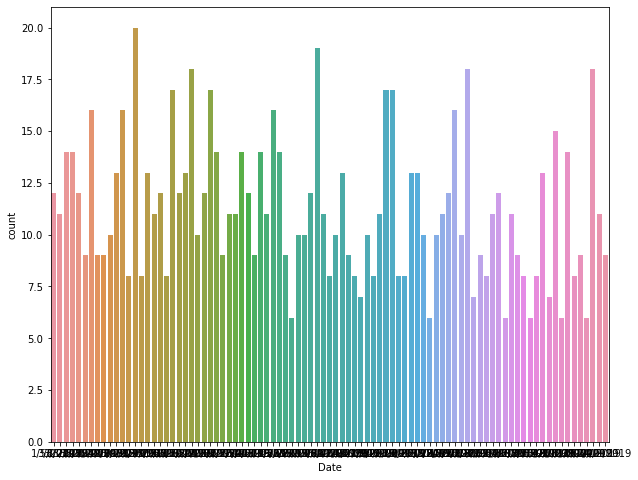

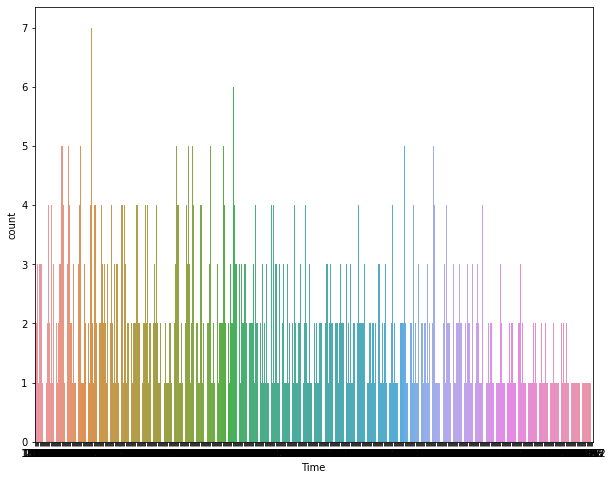

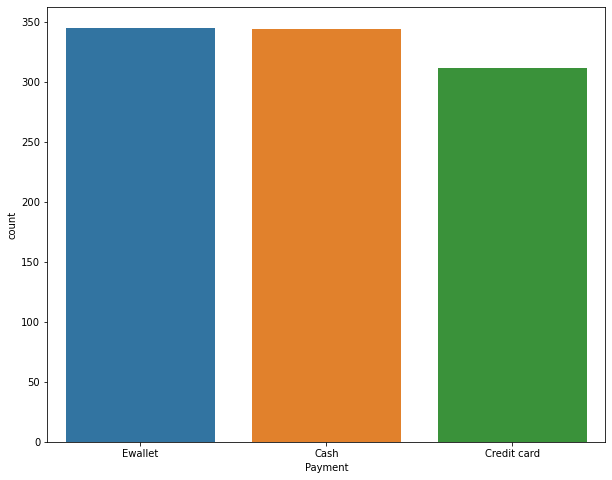

In [60]:
for col in categorical:
    plt.figure(figsize=(10,8))
    sns.countplot(x=df[col])
    plt.show()

In [61]:
# see what the best selling Product line for each branch
print(pd.pivot_table(df, index = 'Product line', columns = 'Branch', values = 'gross income', aggfunc ='count'))

Branch                   A   B   C
Product line                      
Electronic accessories  60  55  55
Fashion accessories     51  62  65
Food and beverages      58  50  66
Health and beauty       47  53  52
Home and lifestyle      65  50  45
Sports and travel       59  62  45


In [62]:
# the best selling branch
b = df.groupby('Branch')[['gross income']].mean().reset_index()
b

,Branch,gross income
0,A,14.874001
1,B,15.232024
2,C,16.052367


<AxesSubplot:xlabel='Branch', ylabel='gross income'>

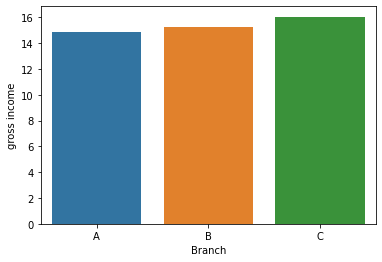

In [63]:
sns.barplot(x = 'Branch', y = 'gross income', data = b)

In [65]:
# most rating branch
b = df.groupby('Branch')[['Rating']].mean().reset_index()
b

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


In [81]:
# gross income of different product lines
b = df.groupby('Product line')['gross income'].sum().reset_index()
b

,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

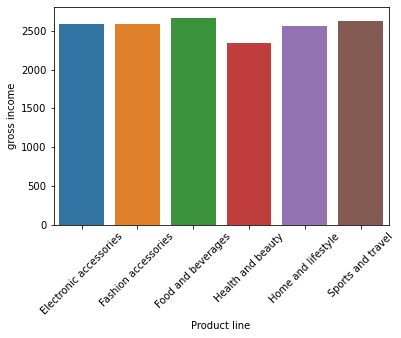

In [85]:
sns.barplot(x='Product line', y='gross income', data=b)
plt.xticks(rotation=45)

In [66]:
# which day gross income is most
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] = df['Date'].dt.day_name()
w = df.groupby('weekday')[['gross income']].sum().reset_index()
w

,weekday,gross income
0,Friday,2091.7305
1,Monday,1804.7180
2,Saturday,2672.4195
3,Sunday,2117.0425
4,Thursday,2159.4880
5,Tuesday,2451.5355
6,Wednesday,2082.4350


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

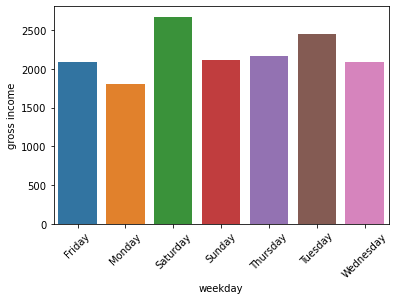

In [67]:
sns.barplot(x = 'weekday', y = 'gross income', data = w)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

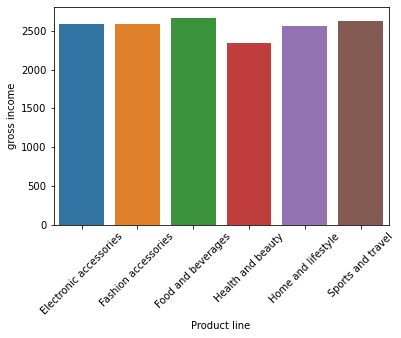

In [73]:
sns.barplot(x = 'Product line', y = 'gross income', data = b)
plt.xticks(rotation=45)

In [74]:
# as C is most sought out branch we can dig deep into it
b = df.groupby('Branch')
branch_C = b.get_group('C')

branch_C =pd.DataFrame(branch_C)
branch_C

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,Monday
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0,Sunday
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2019-02-25,11:24,Ewallet,430.20,4.761905,21.5100,4.8,Monday
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2019-02-06,10:42,Ewallet,397.68,4.761905,19.8840,7.5,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,2019-01-23,10:33,Cash,699.72,4.761905,34.9860,6.1,Wednesday
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,2019-01-09,11:40,Cash,674.59,4.761905,33.7295,6.0,Wednesday
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,2019-03-29,19:12,Ewallet,823.40,4.761905,41.1700,4.3,Friday
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9,Monday


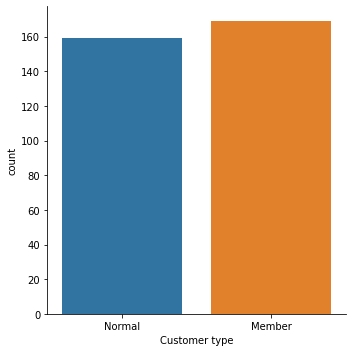

In [75]:
# most customer type
sns.catplot(x='Customer type', kind='count', data=branch_C)

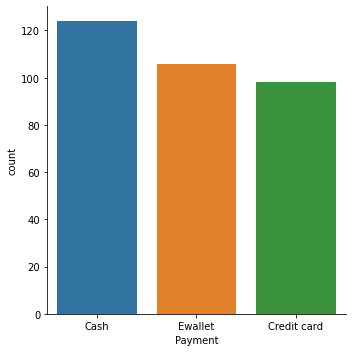

In [76]:
# most payment type
sns.catplot(x='Payment', kind='count', data=branch_C)

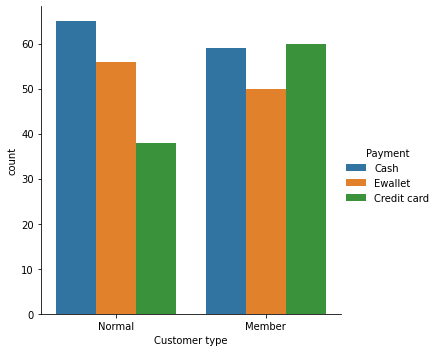

In [77]:
# how customers type pay
sns.catplot(x='Customer type', hue='Payment', kind='count', data=branch_C)

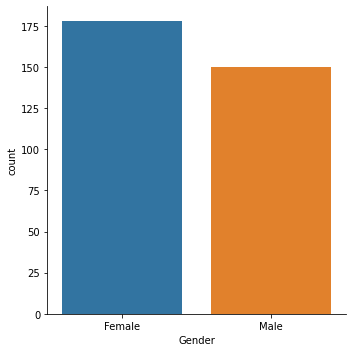

In [78]:
# gender of customers
sns.catplot(x='Gender', kind='count', data=branch_C)

In [79]:
import statsmodels.api as sm

x = branch_C[['Unit price','Quantity','Total','Rating','cogs','Tax 5%']]
y = branch_C[['gross income']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.675e+31
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:30:03   Log-Likelihood:                 9976.7
No. Observations:                 328   AIC:                        -1.994e+04
Df Residuals:                     323   BIC:                        -1.992e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0   5.19e-15          0      1.000   -1.02e-14    1.02e-14
Unit price -1.388e-17   6.35e-17     -0.218      0.827   -1.39e-16    1.11e-16
Quantity            0   6.49e-16          0      1.000   -1.28e-15    1.28e-15
Total          0.0249   5.06e-18   4.93e+15      0.000       0.025       0.025
Rating      5.551e-16   4.89e-16      1.136      0.257   -4.07e-16    1.52e-15
cogs           0.0238   4.82e-18   4.93e+15      0.000       0.024       0.024
Tax 5%         0.0012   2.41e-19   4.93e+15      0.000       0.001       0.001
==============================================================================
Omnibus:                       36.258   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.838
Skew:                          -0.913   Prob(JB):                     1.11e-10
Kurtosis:                       3.142   Cond. No.                     1.71e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.93e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""